# Shared genes phenotypes

###### First version 17/06/2022
###### Latest modif 07/08/2023

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from datetime import datetime
import os
import glob
#from pySankey.sankey import sankey
import imageio
from pandas.plotting import parallel_coordinates
from matplotlib.colors import LogNorm,ListedColormap,LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as colors


DATE = datetime.now().strftime("%Y-%m-%d")

In [146]:
#plot parameters

plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = '12'
sns.set(style="white")
plt.rcParams['figure.constrained_layout.use'] = True

In [147]:
#p_value_min = 5.7  # -math.log10(0.05/len(x))
##directory_genes='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/2022_11_23_covar_fix/'

save_dir= '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/'
type_phenots='main' # supplementary, main
if type_phenots=='main':
    ##### MAIN PHENOTYPES
    MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
    MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'
    all_files = list(MAIN_LABELS.split(","))
    all_files_new = list(MAIN_NAMES.split(","))
    df_i=pd.read_csv('/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/intersections_all_main_vZekavat.csv')

elif type_phenots=='supplementary':
    #### SUPPLEMENTARY PHENOTYPES
    SUPPLEMENTARY_LABELS='tau1_all,tau1_artery,tau1_vein,ratio_AV_DF,tau2_all,tau2_artery,tau2_vein,tau4_all,tau4_artery,tau4_vein,D_std,D_A_std,D_V_std,D_CVMe,D_CVMe_A,D_CVMe_V,sd_mean_size,N_median_main_arteries,N_median_main_veins,arcLength_artery,arcLength_vein,bifurcations,VD_orig_all,VD_orig_artery,VD_orig_vein,ratio_VD,FD_all,FD_artery,FD_vein,mean_angle_taa,mean_angle_tva,eq_CRAE,eq_CRVE,median_CRAE,median_CRVE,CRAE,CRVE,ratio_CRAE_CRVE,ratio_median_CRAE_CRVE,ratio_standard_CRE,medianDiameter_all,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
    SUPPLEMENTARY_NAMES='tortuosity,A tortuosity,V tortuosity,ratio tortuosity,tortuosity2,A tortuosity2,V tortuosity2,tortuosity3,A tortuosity3,V tortuosity3,std diameter,A std diameter,V std diameter,CVMe diameter,A CVMe diameter,V CVMe diameter,std norm diameter,A num main,V num main,A arc length,V arc length,bifurcations,vascular density,A vascular density,V vascular density,ratio vascular density,fractal dimension,A fractal dimension,V fractal dimension,A temporal angle,V temporal angle,A central retinal eq,V central retinal eq,A main diameter,V main diameter,A central retinal eq2,V central retinal eq2,ratio central retinal eq,ratio main diameter,ratio central retinal eq2,median diameter,A median diameter,V median diameter,ratio median diameter'
    all_files = list(SUPPLEMENTARY_LABELS.split(","))
    all_files_new = list(SUPPLEMENTARY_NAMES.split(","))
    df_i=pd.read_csv('/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/intersections_all_suplementary_vZekavat.csv')


fig_dir = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/'
df_both=pd.read_csv(fig_dir +'both_main_vZekavat.csv', index_col=0)
df_values=pd.read_csv(fig_dir + 'intersections_main_vZekavat.csv', index_col=0)
df_names=pd.read_csv(fig_dir + 'intersections_genes_name_main_vZekavat.csv', index_col=0)


In [148]:
### which genes is in one but not in the other:

# Read the CSV file into a DataFrame
df_genes_look = df_i.copy()

# Filter the genes associated with 'tau1_artery' but not 'tau1_vein'
fitler_1 = 'ratio_CRAE_CRVE' #'ratio_AV_medianDiameter' #'ratio_AV_medianDiameter' #'tau1_artery'
fitler_2 = 'eq_CRAE' #'medianDiameter_artery' #'medianDiameter_artery' #'tau1_vein'
fitler_3 = 'eq_CRVE' #'medianDiameter_vein' #'medianDiameter_vein' #'tau1_artery'

filtered_df = df_genes_look[
    (df_genes_look['file_col'] == fitler_1) & 
    (~df_genes_look['gen'].isin(df_genes_look[df_genes_look['file_col'] == fitler_2]['gen'])) &
    (~df_genes_look['gen'].isin(df_genes_look[df_genes_look['file_col'] == fitler_3]['gen']))
]

# Print the resulting genes
print(filtered_df['gen'])


788       CUX2
855      MCF2L
935      NR5A2
986    FAM109A
Name: gen, dtype: object


In [149]:
df_pintar = df_values
#df_pintar.columns = list((df_names.columns))
#df_pintar.index = list((df_names.index))

#df_pintar= df_pintar.drop(columns=['Unnamed: 0'])
#df_pintar.index= df_pintar.columns
#df_pintar=df_pintar.astype(int)
#df_pintar=df_pintar.round(0) #.astype(int)
df_pintar.rename(columns=dict(zip(all_files, all_files_new)), inplace=True)
df_pintar.rename(index=dict(zip(all_files, all_files_new)), inplace=True)
#sns.set(style="white")
#print(df_pintar.columns)

np_upper = np.triu(df_pintar, k=+1)

#df = df1.fillna(df2)
mask = np.zeros_like(np_upper)
mask[np.triu_indices_from(mask, k=+1)] = True


#### SIMPLE FIGURE

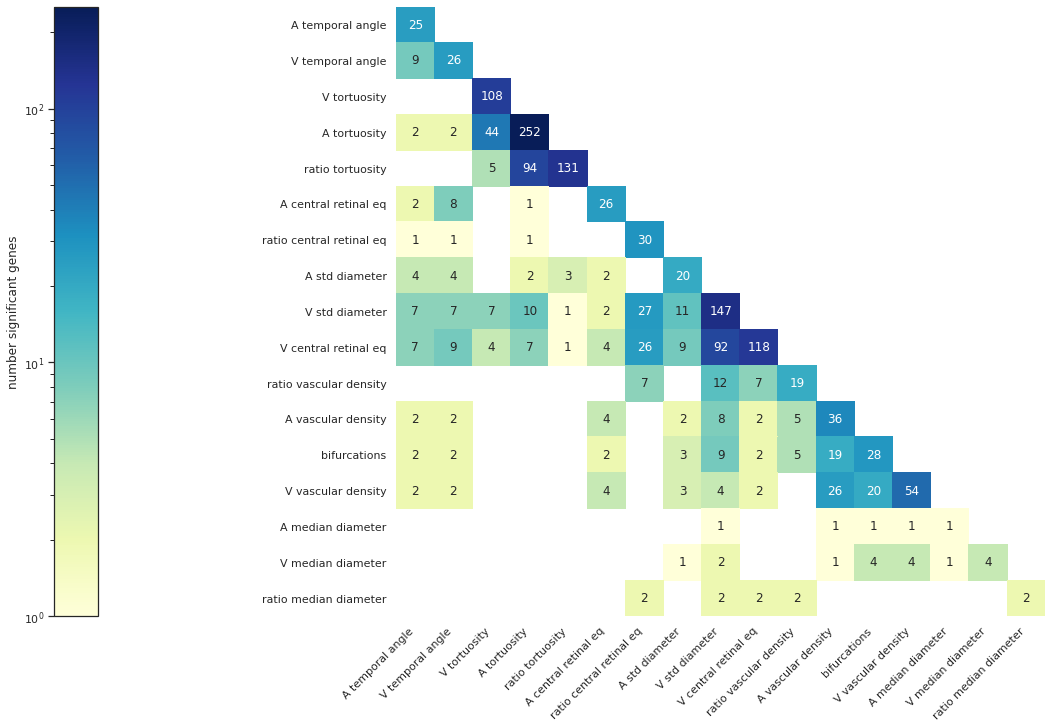

In [150]:
individual_plot_cbar_by_default = 'other' #False # False
#sns.set(style="white")
#plt.rcParams['font.size'] = '14'
#plt.rcParams['axes.labelsize'] = 14
#plt.rcParams['axes.titlesize'] = 14

if individual_plot_cbar_by_default == 'other':
    size_cbar_label = 12

    size_a=14.5
    size_b= 10
    fig, ax = plt.subplots(figsize=(size_a,size_b))
    sns.heatmap(df_pintar, annot=df_pintar, fmt='',  cmap="YlGnBu",  norm=LogNorm(), cbar=False, mask=mask)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')
    fig.colorbar(ax.collections[0], ax=ax, location="left", use_gridspec=None, pad=0.2).set_label(label='number significant genes', size=size_cbar_label)
    plt.show()


elif individual_plot_cbar_by_default:
    size_cbar_label = 12

    size_a=10
    size_b= 8
    fig, ax = plt.subplots(figsize=(size_a,size_b))
    #plt.subplots(figsize=(size_a,size_b))

    sns.heatmap(df_pintar, annot=df_pintar, fmt='',  cmap="YlGnBu",  norm=LogNorm(),  mask=mask, cbar_kws={'label': 'number significant genes'})
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')
    #plt.savefig(save_results+'/'+str(DATE)+'_half1_ventile'+str(num_ventile)+ '_heatmap_genes_intersection_'+ str(phenotypes_type)+'.pdf', edgecolor='none')
    plt.show()

else:
    print('no plot scatter')

In [151]:
mapping_labels = dict(zip(all_files, all_files_new))
mapping_order = dict(zip(all_files_new, list(range(len(all_files_new)))))

In [152]:
df_i['gen'].value_counts().index

Index(['CTC-498M16.4', 'LINC00461', 'C14orf39', 'HERC2', 'FGF21', 'IZUMO1',
       'FLT1', 'OCA2', 'CTD-2568P8.1', 'NTN5',
       ...
       'ZNF827', 'CCDC103', 'WDR6', 'CTC-360G5.9', 'PLEKHO1', 'SPDYE3',
       'ARL17B', 'MEPCE', 'CELA3A', 'ATF6B'],
      dtype='object', length=634)

In [153]:
N_head = 30
list_genes=list(df_i['gen'].value_counts().head(N_head).index)

In [154]:
df_reduc = df_i[df_i['gen'].isin(list_genes)].copy()

df_reduc['file_col'] = df_reduc['file_col'].map(mapping_labels)
df_reduc['order']= df_reduc['file_col'].map(mapping_order)

df_reduc.sort_values(by='order', ascending=True, inplace=True)

In [155]:
### RE ORDER THE Y AXIS
# Calculate the count of points for each gen
gen_counts = df_reduc['gen'].value_counts()

# Sort the gen values based on the count
sorted_gens = gen_counts.sort_values(ascending=False).index

# Create a new column to specify the order of the gens
df_reduc['gen_order'] = df_reduc['gen'].map(dict(zip(sorted_gens, range(len(sorted_gens)))))

# Sort the DataFrame by 'gen_order' column IF I DO THIS THE X-AXIS IS NOT IN ORDER
#df_reduc.sort_values(by='gen_order', ascending=True, inplace=True)

### not completly shorted, but the best solution I found
df_reduc.sort_values(by=['order', 'gen_order'], ascending=[True, True], inplace=True)

## COMBINED FIGURE:

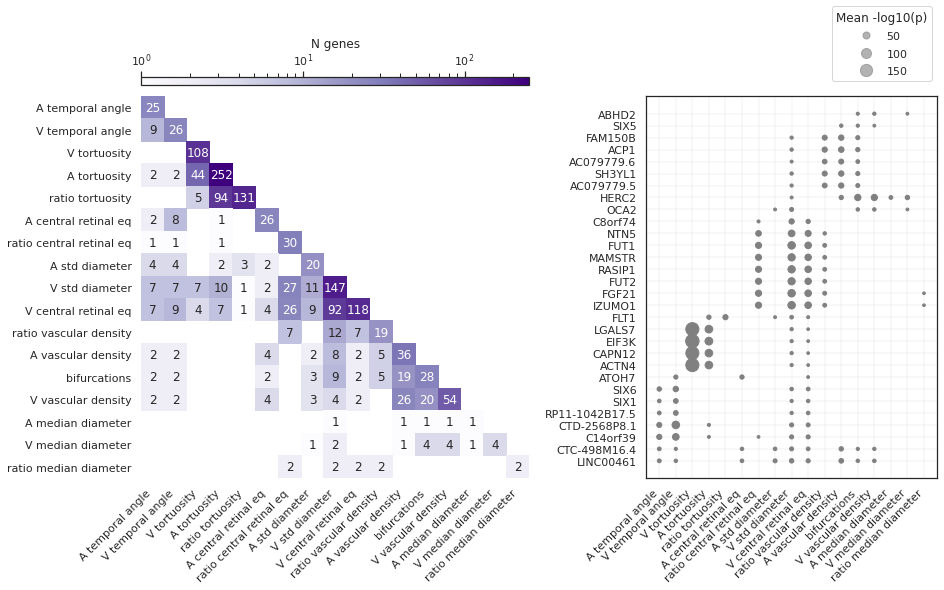

In [156]:
#df_reduc.sort_values(by='order', ascending=False, inplace=True)

#sns.set(style="white")
#plt.rcParams['font.size'] = '12'
#plt.rcParams['axes.labelsize'] = 12
#plt.rcParams['axes.titlesize'] = 12
#plt.rcParams['figure.constrained_layout.use'] = True

cbar_by_default = False  # Set the value of cbar_by_default
# Define df_pintar and mask appropriately

figsize_val = (13,8)

fig, ax = plt.subplots(1, 2, figsize=figsize_val, gridspec_kw={'width_ratios': [4, 3]})

fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='', cmap="Purples", norm=LogNorm(), cbar=False, mask=mask, ax=ax[0])
fig1.set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
if cbar_by_default:
    cbar = fig.colorbar(ax[0].collections[0], ax=ax[0], location="right", use_gridspec=None, pad=0.01, aspect=30)
else:
    cbar = fig.colorbar(ax[0].collections[0], ax=ax[0], location="top", use_gridspec=None, pad=0.01, aspect=30)
cbar.set_label(label='N genes', fontsize=12)
cbar.ax.set_anchor((0.07, 0.5))

#df_reduc = df_reduc.iloc[::-1]  # to reorder
fig2 = ax[1].scatter(df_reduc['file_col'], df_reduc['gen'], s=1.25*df_reduc['-log10(p)'], c='grey')
#plt.yticks(range(len(sorted_gens)), sorted_gens)
plt.grid(color='gray', linestyle='-', linewidth=0.1)
cmap_label = 'Pleiotropy (N trait pairs)'
plt.xticks(rotation=45, ha='right')
kw = dict(prop='sizes', num=4, color='grey', alpha=0.6)
ax[1].legend(*fig2.legend_elements(**kw), loc='upper right', title='Mean -log10(p)', bbox_to_anchor=(1, 1.25), title_fontsize=12)


plt.show()
fig.savefig('/SSD/home/sofia/07_08_2023_shared_genes.jpg', dpi=300, format='jpg', bbox_inches='tight', pad_inches=0.1)



## OTHER FIGURES

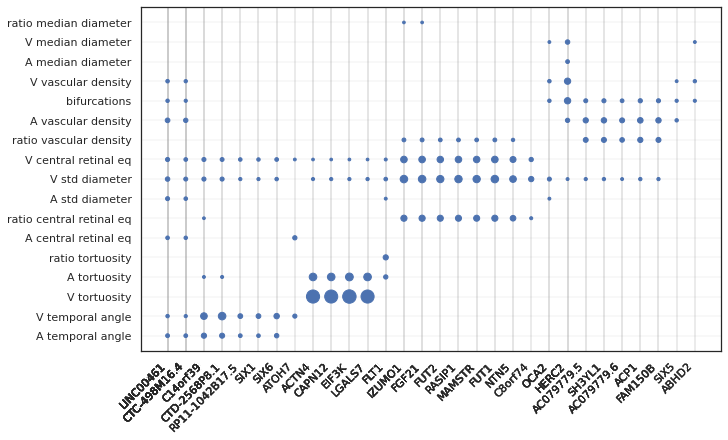

In [157]:
plot_shared_genes = True #False #True

if plot_shared_genes:
    
    if type_phenots=='main':
        plt.figure(figsize=(10, 6))
        name_save='main_genes_phenotypes_scatterplots_25_11_2022.png'
    elif type_phenots=='supplementary':
        plt.figure(figsize=(15, 13))
        name_save='sup_genes_phenotypes_scatterplots_25_11_2022.png'
    #plt.xlabel('Genes') 
    #plt.ylabel('Phenotypes')

    #plt.scatter(df_reduc['gen'], df_reduc['file_col'], cmap='Greens', c=df_reduc['-log10(p)'], s=1.5*df_reduc['-log10(p)'])
    plt.scatter(df_reduc['gen'], df_reduc['file_col'],  s=1.25*df_reduc['-log10(p)'])
    #cbar= plt.colorbar(fraction=0.1)
    #cbar.set_label('-log(p)')
    plt.grid(color='gray', linestyle='-', linewidth=0.1)
    #plt.stem(df_reduc['gen'], df_reduc['file_col'],  basefmt = " ") #markerfmt='.',
    plt.xticks(df_reduc['gen'], rotation=45, ha='right')
    #plt.savefig('/SSD/home/sofia/' + name_save ,  transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=150)

else:
    print('continue')


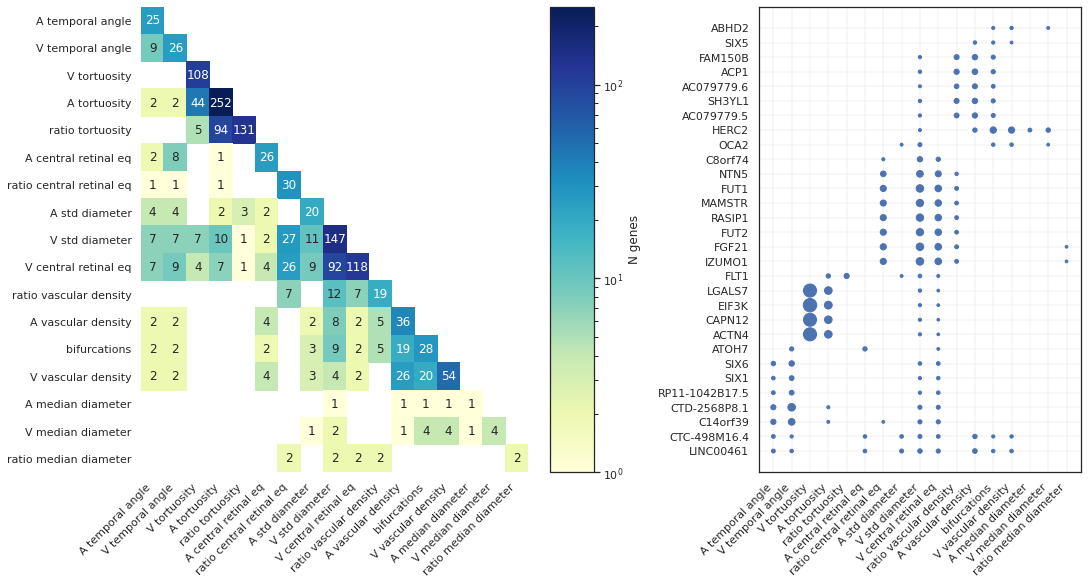

In [158]:
other_figure=True #False

if other_figure:
    #sns.set(style="white")
    #plt.rcParams['font.size'] = '14'
    #plt.rcParams['axes.labelsize'] = 14
    #plt.rcParams['axes.titlesize'] = 14
    #plt.rcParams['figure.constrained_layout.use'] = True
    size_cbar_label = 12

    figsize_val=(15, 8)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize_val, gridspec_kw={'width_ratios': [1.2, 1]})

    fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='', cmap="YlGnBu", norm=LogNorm(), cbar=False, mask=mask, ax=ax1)
    fig1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

    if cbar_by_default:
        fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=None, pad=0.02).set_label(label='N genes', size=size_cbar_label)
    else:
        fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=None, pad=0.03).set_label(label='N genes', size=size_cbar_label)

    fig2 = ax2.scatter(df_reduc['file_col'], df_reduc['gen'], s=1.25*df_reduc['-log10(p)'])
    ax2.grid(color='gray', linestyle='-', linewidth=0.1)
    plt.xticks(rotation=45, ha='right')

    plt.show()

    #plt.xlabel('Vascular IDPs')

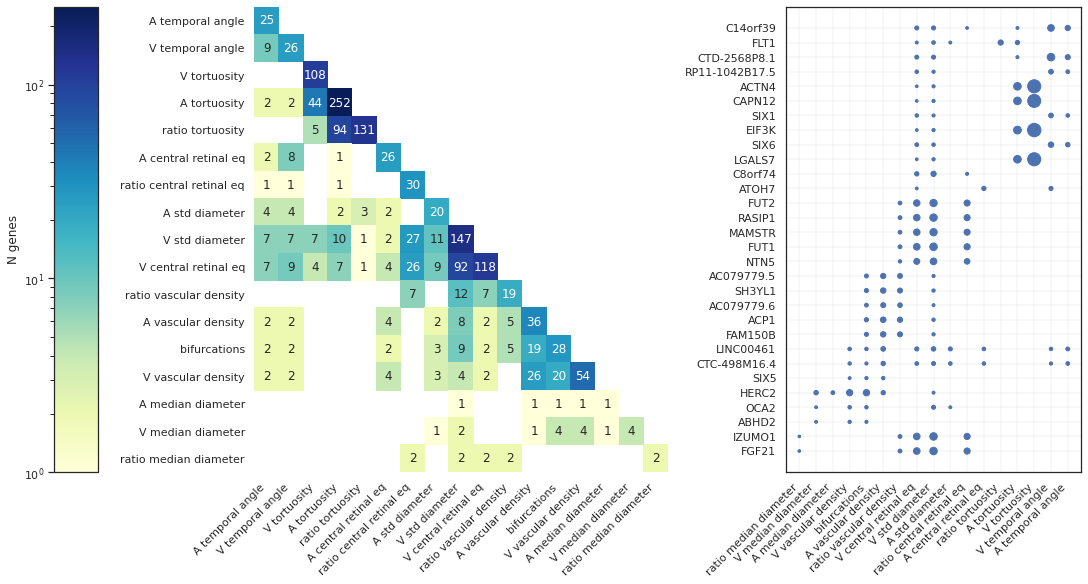

In [159]:

if other_figure:
    #sns.set(style="white")
    #plt.rcParams['font.size'] = '12'
    #plt.rcParams['axes.labelsize'] = 12
    #plt.rcParams['axes.titlesize'] = 12
    #plt.rcParams['figure.constrained_layout.use'] = True
    size_cbar_label = 12

    figsize_val=(15, 8)

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=figsize_val, gridspec_kw={'width_ratios': [1.4, 1]}) # sharey=True, 

    fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='',  cmap="YlGnBu",  norm=LogNorm(), cbar=False, mask=mask, ax=ax1)
    fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right')
    #fig.tight_layout(pad=5.0)

    if cbar_by_default:
        fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=None, pad=0.02).set_label(label='N genes', size=size_cbar_label)

    else:
        fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=None, pad=0.03).set_label(label='N genes', size=size_cbar_label)


    df_reduc = df_reduc.iloc[::-1] ## to reorder
    fig2 = plt.scatter(df_reduc['file_col'], df_reduc['gen'], s=1.25*df_reduc['-log10(p)'])
    fig2 =  plt.grid(color='gray', linestyle='-', linewidth=0.1)
    plt.xticks(rotation=45, ha='right')
    #plt.colorbar(label='-log(p)')
    #divider = make_axes_locatable(axes)
    #cax = divider.append_axes('right', size='2.5%', pad=0.2)
    #iax = inset_axes(cax, width='100%', height='75%', loc='center left', borderpad=0)
    #plt.colorbar(cax=iax, label='-log(p)') #, orientation='horizontal')
    #fig2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, ha='right')
    #plt.xlabel('Vascular IDPs')

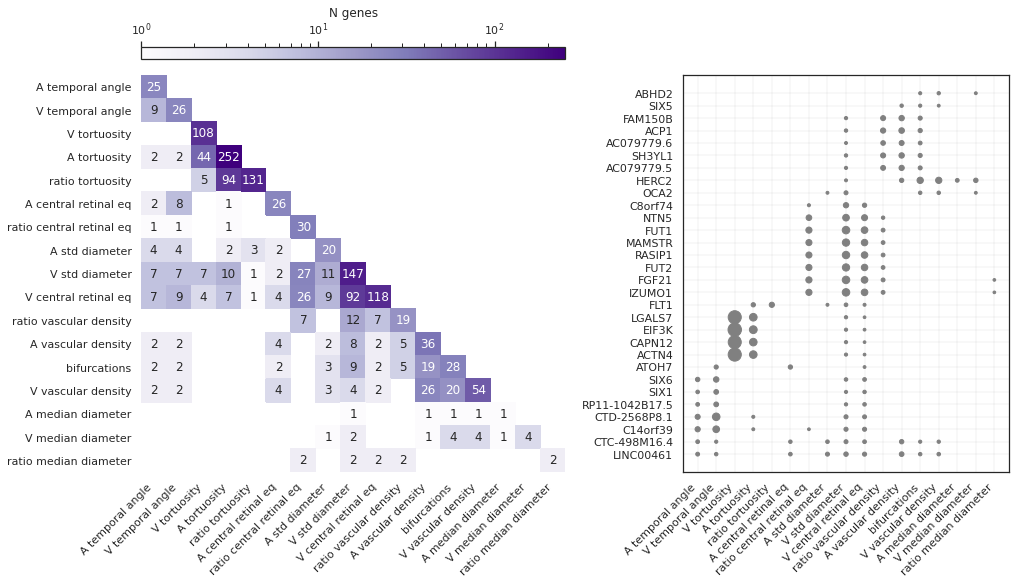

In [160]:
if other_figure:
    cdict = {'red':  ((0.0, 0.99, 0.99),  # low red at 0
                    (1.0, 0.6, 0.6)),   # high red at 1

            'green': ((0.0,  0.9, 0.9),    # high green at 0
                    #(0.5, 0.0, 0.0),    # all channels set to 0.0 at 0.5 to create black
                    (1.0, 0.0, 0.0)), # low green at 1

            'blue':  ((0.0, 0.99, 0.99),    # low blue at 0
                    # (0.5, 0.0, 0.0),    # all channels set to 0.0 at 0.5 to create black
                    (1.0, 0.7, 0.7))  # low blue at 1
        }

    Magenta_c = colors.LinearSegmentedColormap('Magenta_c', cdict)


    ### option2 


    cbar_by_default = False


    sns.set(style="white")
    plt.rcParams['font.size'] = '12'
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['figure.constrained_layout.use'] = True
    size_cbar_label = 12


    figsize_val=(14, 8)

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=figsize_val, gridspec_kw={'width_ratios': [1.3, 1]}) # sharey=True, 

    fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='',  cmap="Purples",  norm=LogNorm(), cbar=False, mask=mask, ax=ax1)
    fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right')
    #fig.tight_layout(pad=5.0)

    if cbar_by_default:
        fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=None, pad=0.02).set_label(label='N genes', size=size_cbar_label)

    else:
        fig.colorbar(ax1.collections[0], ax=ax1, location="top", use_gridspec=None, pad=0.02).set_label(label='N genes', size=size_cbar_label)


    df_reduc = df_reduc.iloc[::-1] ## to reorder
    fig2 = plt.scatter(df_reduc['file_col'], df_reduc['gen'], s=1.25*df_reduc['-log10(p)'], c='grey')
    fig2 =  plt.grid(color='gray', linestyle='-', linewidth=0.1)
    plt.xticks(rotation=45, ha='right')

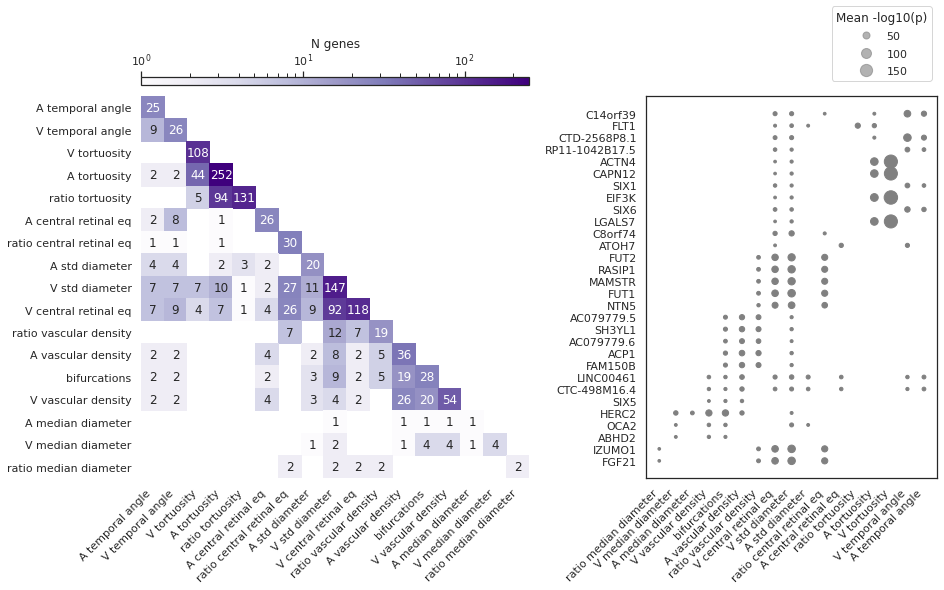

In [161]:
if other_figure:
    #sns.set(style="white")
    #plt.rcParams['font.size'] = '12'
    #plt.rcParams['axes.labelsize'] = 12
    #plt.rcParams['axes.titlesize'] = 12
    #plt.rcParams['figure.constrained_layout.use'] = True

    # Define df_pintar and mask appropriately

    figsize_val = (13, 8)

    fig, ax = plt.subplots(1, 2, figsize=figsize_val, gridspec_kw={'width_ratios': [4, 3]})

    if cbar_by_default:
        fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='', cmap="Purples", norm=LogNorm(), cbar=False, mask=mask, ax=ax[0])
        fig1.set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
        cbar = fig.colorbar(ax[0].collections[0], ax=ax[0], location="right", use_gridspec=None, pad=0.01, aspect=30)
    else:
        fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='', cmap="Purples", norm=LogNorm(), cbar=False, mask=mask, ax=ax[0])
        fig1.set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
        cbar = fig.colorbar(ax[0].collections[0], ax=ax[0], location="top", use_gridspec=None, pad=0.01, aspect=30)
    cbar.set_label(label='N genes', fontsize=12)
    cbar.ax.set_anchor((0.07, 0.5))

    df_reduc = df_reduc.iloc[::-1]  # to reorder
    fig2 = ax[1].scatter(df_reduc['file_col'], df_reduc['gen'], s=1.25 * df_reduc['-log10(p)'], c='grey')
    plt.grid(color='gray', linestyle='-', linewidth=0.1)
    cmap_label = 'Pleiotropy (N trait pairs)'
    plt.xticks(rotation=45, ha='right')
    plt.grid(color='gray', linestyle='-', linewidth=0.1)
    kw = dict(prop='sizes', num=4, color='grey', alpha=0.6)
    ax[1].legend(*fig2.legend_elements(**kw), loc='upper right', title='Mean -log10(p)', bbox_to_anchor=(1, 1.25),
                title_fontsize=12)

    plt.show()

        #fig.savefig('/SSD/home/sofia/28_03_2023_shared_genes.jpg', dpi=300, format='jpg', bbox_inches='tight', pad_inches=0.1)


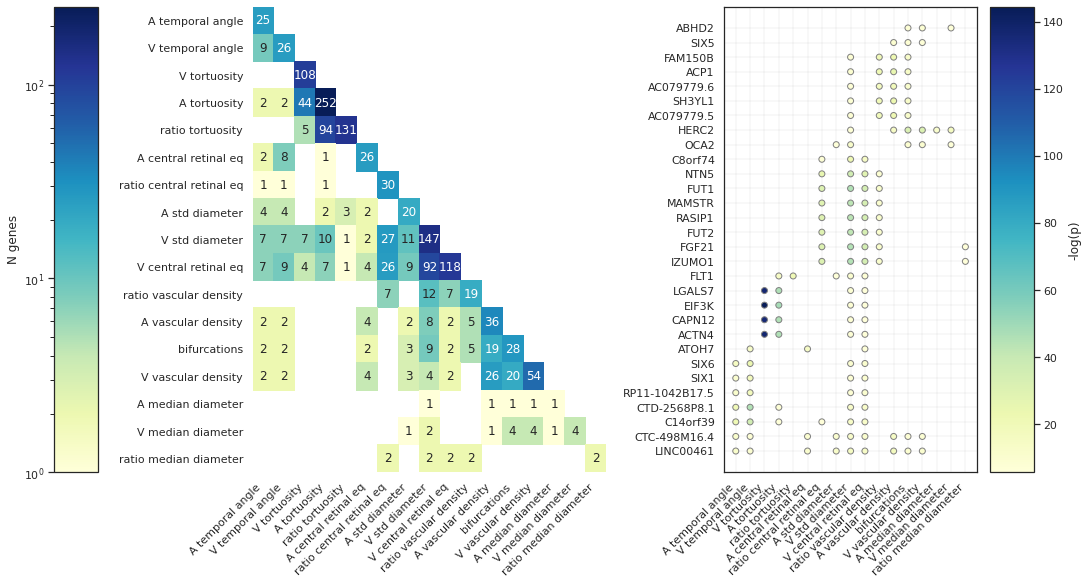

In [162]:

#sns.set(style="white")
#plt.rcParams['font.size'] = '12'
#plt.rcParams['axes.labelsize'] = 12
#plt.rcParams['axes.titlesize'] = 12
#plt.rcParams['figure.constrained_layout.use'] = True
size_cbar_label = 12


figsize_val=(15, 8)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=figsize_val, gridspec_kw={'width_ratios': [1.4, 1]}) # sharey=True, 

fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='',  cmap="YlGnBu",  norm=LogNorm(), cbar=False, mask=mask, ax=ax1)
fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right')
#fig.tight_layout(pad=5.0)

if cbar_by_default:
    fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=None, pad=0.02).set_label(label='N genes', size=size_cbar_label)

else:
    fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=None, pad=0.03).set_label(label='N genes', size=size_cbar_label)


df_reduc = df_reduc.iloc[::-1] ## to reorder
fig2 = plt.scatter(df_reduc['file_col'], df_reduc['gen'], c=df_reduc['-log10(p)'], cmap="YlGnBu", marker='o', edgecolors='gray') #s=1.25*df_reduc['-log10(p)'])
fig2 =  plt.grid(color='gray', linestyle='-', linewidth=0.1)
plt.xticks(rotation=45, ha='right')
plt.colorbar(label='-log(p)')
#divider = make_axes_locatable(axes)
#cax = divider.append_axes('right', size='2.5%', pad=0.2)
#iax = inset_axes(cax, width='100%', height='75%', loc='center left', borderpad=0)
#plt.colorbar(cax=iax, label='-log(p)') #, orientation='horizontal')
#fig2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, ha='right')
#plt.xlabel('Vascular IDPs')